In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import csv

In [4]:
df = pd.read_csv("C:\\Users\\stefc\\project\\HbA1c_byIMD_2.csv")
print(df.head())

   No_requests  mean_HbA1c  median_HbA1c  min_HbA1c  max_HbA1c  LSOA code  \
0          200   49.660000          38.5         27        131  E01029637   
1          272   54.672794          47.0         29        131  E01010435   
2          366   58.683060          55.0         29        142  E01010459   
3          463   50.587473          46.0         26        120  E01010510   
4          502   54.942231          50.0         25        175  E01010484   

                            LSOA Name  IMD_Rank  IMD_Decile  Income_Rank  ...  \
0  South Staffordshire 006D E01029637     14945           5        19016  ...   
1        Wolverhampton 006A E01010435      2007           1          994  ...   
2        Wolverhampton 008B E01010459     10350           4         9735  ...   
3        Wolverhampton 017C E01010510     10234           4        10955  ...   
4        Wolverhampton 007C E01010484      2176           1         1177  ...   

   Barriers to Housing and Services Rank  \
0     

In [5]:
#mean Hba1c data was taken from in house source - indivisual values per site not used for anonymisation purposes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   No_requests                              62 non-null     int64  
 1   mean_HbA1c                               62 non-null     float64
 2   median_HbA1c                             62 non-null     float64
 3   min_HbA1c                                62 non-null     int64  
 4   max_HbA1c                                62 non-null     int64  
 5   LSOA code                                62 non-null     object 
 6   LSOA Name                                62 non-null     object 
 7   IMD_Rank                                 62 non-null     int64  
 8   IMD_Decile                               62 non-null     int64  
 9   Income_Rank                              62 non-null     int64  
 10  Income_Decile                            62 non-null

In [6]:
#describing dataset
df.describe()

,No_requests,mean_HbA1c,median_HbA1c,min_HbA1c,max_HbA1c,IMD_Rank,IMD_Decile,Income_Rank,Income_Decile,Income Score,...,Barriers to Housing and Services Rank,Barriers to Housing and Services Decile,Living Environment Rank,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,2127.451613,50.574392,45.677419,22.161290,151.129032,11279.225806,3.967742,10111.354839,3.580645,0.185968,...,20778.580645,6.838710,12739.935484,4.338710,11513.564516,3.983871,0.213645,9921.854839,3.500000,0.242032
std,1753.976369,4.333628,4.723586,4.410099,16.099571,7691.571270,2.360659,7273.147985,2.287159,0.094566,...,8000.842756,2.423881,6555.267823,1.958115,8114.818713,2.446087,0.116647,7246.804354,2.200968,0.123954
min,200.000000,42.804486,38.000000,12.000000,119.000000,2007.000000,1.000000,994.000000,1.000000,0.063000,...,4793.000000,2.000000,748.000000,1.000000,457.000000,1.000000,0.037000,204.000000,1.000000,0.072000
25%,861.000000,45.755578,40.000000,21.000000,141.000000,4051.250000,2.000000,3138.750000,1.250000,0.091500,...,14806.500000,5.000000,8688.000000,3.000000,4287.500000,2.000000,0.125000,3274.500000,1.250000,0.135250
50%,1559.500000,51.621069,47.000000,23.000000,149.500000,10292.000000,4.000000,9572.000000,3.000000,0.161000,...,20779.500000,7.000000,12247.000000,4.000000,9893.500000,4.000000,0.203000,8697.500000,3.000000,0.219500
75%,2622.250000,53.629661,49.000000,25.000000,160.750000,17165.000000,6.000000,17657.500000,6.000000,0.272000,...,27475.000000,9.000000,17673.000000,6.000000,16540.000000,5.750000,0.302750,15581.500000,5.000000,0.341500
max,8644.000000,58.683060,55.000000,29.000000,205.000000,26085.000000,8.000000,23097.000000,8.000000,0.352000,...,32578.000000,10.000000,29216.000000,9.000000,29683.000000,10.000000,0.477000,24901.000000,8.000000,0.606000


In [35]:
result = df.groupby('LSOA Name').agg({'No_requests': ['count', 'sum', 'mean', 'min', 'max']})
print("Mean, min, and max requests grouped by LSOA name")
pd.set_option('display.max_rows', None)
display(result)

Mean, min, and max requests grouped by LSOA name


No_requests                          
                                         count   sum    mean   min   max
LSOA Name                                                               
Bridgnorth 006C E01028842                    1   724   724.0   724   724
Cannock Chase 005D E01029389                 2  4035  2017.5  1240  2795
Cannock Chase 006C E01029399                 1  2551  2551.0  2551  2551
Cannock Chase 007E E01029358                 1  1960  1960.0  1960  1960
Cannock Chase 008B E01029350                 1  2566  2566.0  2566  2566
Cannock Chase 009C E01029382                 1  4547  4547.0  4547  4547
Cannock Chase 011E E01029367                 1  5857  5857.0  5857  5857
Cannock Chase 012B E01029360                 1  7669  7669.0  7669  7669
Cannock Chase 012C E01029361                 1  3382  3382.0  3382  3382
Cannock Chase 013C E01029396                 1  5253  5253.0  5253  5253
South Staffordshire 004B E01029622           2  8609  4304.5  3410  5199
South Staffordshire 005E E01029644           2  5665  2832.5  2116  3549
South Staffordshire 006D E01029637           2   883   441.5   200   683
South Staffordshire 007B E01029633           1   744   744.0   744   744
South Staffordshire 007D E01029635           1  1555  1555.0  1555  1555
South Staffordshire 008C E01029615           1  1158  1158.0  1158  1158
South Staffordshire 008D E01029627           1  1707  1707.0  1707  1707
South Staffordshire 011B E01029664           1   944   944.0   944   944
South Staffordshire 011C E01029666           1  1022  1022.0  1022  1022
South Staffordshire 012A E01029671           1  2641  2641.0  2641  2641
South Staffordshire 012C E01029676           1  3796  3796.0  3796  3796
Walsall 027C E01010406                       1  3864  3864.0  3864  3864
Wolverhampton 002A E01010495                 1  1337  1337.0  1337  1337
Wolverhampton 002C E01010499                 1   705   705.0   705   705
Wolverhampton 002D E01010500                 1   759   759.0   759   759
Wolverhampton 004C E01010462                 1  1363  1363.0  1363  1363
Wolverhampton 005A E01010555                 1   711   711.0   711   711
Wolverhampton 005C E01010557                 1   623   623.0   623   623
Wolverhampton 006A E01010435                 1   272   272.0   272   272
Wolverhampton 007C E01010484                 2  1885   942.5   502  1383
Wolverhampton 007D E01010485                 1   782   782.0   782   782
Wolverhampton 008B E01010459                 2  1549   774.5   366  1183
Wolverhampton 008D E01010461                 1  3693  3693.0  3693  3693
Wolverhampton 009B E01010540                 1  1920  1920.0  1920  1920
Wolverhampton 012C E01010564                 1  2395  2395.0  2395  2395
Wolverhampton 013D E01010525                 1  4251  4251.0  4251  4251
Wolverhampton 015B E01010472                 1  1469  1469.0  1469  1469
Wolverhampton 016D E01010529                 1  4158  4158.0  4158  4158
Wolverhampton 017B E01010508                 1   929   929.0   929   929
Wolverhampton 017C E01010510                 2  1818   909.0   463  1355
Wolverhampton 018E E01010447                 1   857   857.0   857   857
Wolverhampton 018F E01010448                 1  1863  1863.0  1863  1863
Wolverhampton 019D E01010552                 1  2272  2272.0  2272  2272
Wolverhampton 020A E01010463                 2  2428  1214.0   630  1798
Wolverhampton 020F E01010521                 1  1564  1564.0  1564  1564
Wolverhampton 021B E01010488                 1   873   873.0   873   873
Wolverhampton 026D E01010516                 1  1121  1121.0  1121  1121
Wolverhampton 027D E01010422                 1  2200  2200.0  2200  2200
Wolverhampton 030D E01010519                 1  1181  1181.0  1181  1181
Wolverhampton 031C E01010515                 1  2245  2245.0  2245  2245
Wolverhampton 033A E01010410                 2  2351  1175.5   579  1772
Wolverhampton 035E E01010433                 1  2552  2552.0  2552  2552
Wolverhampton 035G E

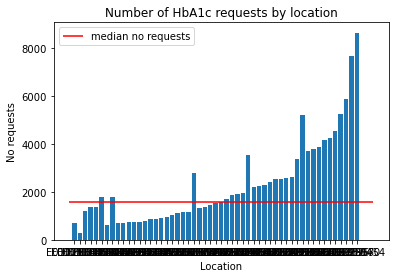

In [22]:
#HbA1c requests by LSOA code which represents a geographic area.
variable = df['No_requests']
fig, ax = plt.subplots()
ax.bar(data=df, x='LSOA code', height='No_requests');
ax.set_xlabel('Location')
ax.set_ylabel('No requests')
ax.set_title('Number of HbA1c requests by location')
plt.hlines(1560, xmin=-1.0, xmax=55, color= 'red', label= 'median no requests')
plt.legend()


Text(0.5, 1.0, 'HbA1c requests by IMD decile')

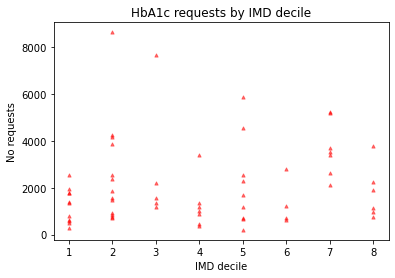

In [23]:
#requests for HbA1c by IMD decile
fig, ax = plt.subplots()

ax.scatter(x=df['IMD_Decile'], y=df['No_requests'], 
           c= 'red', #this is the colour
           alpha=0.5, # this is saturaiotn level of markers
           s=10, #this is the size of markers
           marker='^')
ax.set_xlabel('IMD decile')
ax.set_ylabel('No requests')
ax.set_title('HbA1c requests by IMD decile')

In [27]:
x=df['IMD_Decile']
y=df['No_requests']
np.corrcoef(x, y)
#correlation is 0.12- no correlation

array([[1.        , 0.12917812],
       [0.12917812, 1.        ]])

Text(0.5, 1.0, 'HbA1c  requests by Health_and_Disability_Decile')

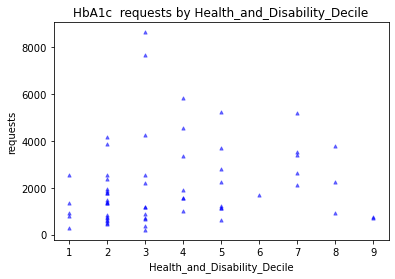

In [28]:
#requests by Health_and_Disability_Decile
fig, ax = plt.subplots()

ax.scatter(x=df['Health_and_Disability_Decile'], y=df['No_requests'], 
           c= 'blue', 
           alpha=0.5, 
           s=10, 
           marker='^')
ax.set_xlabel('Health_and_Disability_Decile')
ax.set_ylabel('requests')
ax.set_title('HbA1c  requests by Health_and_Disability_Decile')

In [29]:
x=df['Health_and_Disability_Decile']
y=df['No_requests']
np.corrcoef(x, y)
#correlation is 0.159- no correlation

array([[1.        , 0.15988889],
       [0.15988889, 1.        ]])

In [45]:
#the plot above appears to show more points in the lower deciles so I decided to group totla number of requests by decile.
result = df.groupby('Health_and_Disability_Decile').agg({'No_requests': ['count', 'sum', 'mean', 'min', 'max']})
print("Mean, min, and max requests grouped by health and disability decile")
pd.set_option('display.max_rows', None)
display(result)


Mean, min, and max requests grouped by health and disability decile


No_requests                                
                                   count    sum         mean   min   max
Health_and_Disability_Decile                                            
1                                      5   5912  1182.400000   272  2566
2                                     19  30407  1600.368421   463  4158
3                                     12  30506  2542.166667   200  8644
4                                      7  19847  2835.285714  1022  5857
5                                      8  18155  2269.375000   623  5253
6                                      1   1707  1707.000000  1707  1707
7                                      5  16915  3383.000000  2116  5199
8                                      3   6985  2328.333333   944  3796
9                                      2   1468   734.000000   724   744

In [41]:
result['ratio']=((result.sum/result.count))


TypeError: unsupported operand type(s) for /: 'method' and 'method'

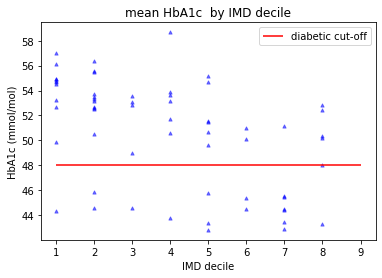

In [47]:
#mean HbA1c by IMD decile
fig, ax = plt.subplots()

ax.scatter(x=df['IMD_Decile'], y=df['mean_HbA1c'], 
           c= 'blue', 
           alpha=0.5, 
           s=10, 
           marker='^')
ax.set_xlabel('IMD decile')
ax.set_ylabel('HbA1c (mmol/mol)')
ax.set_title('mean HbA1c  by IMD decile')
plt.hlines(48, xmin=1, xmax=9, color= 'red', label= 'diabetic cut-off')
plt.legend()


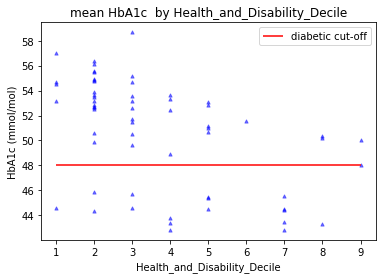

In [37]:
#mean HbA1c by Health_and_Disability_Decile
fig, ax = plt.subplots()

ax.scatter(x=df['Health_and_Disability_Decile'], y=df['mean_HbA1c'], 
           c= 'blue', 
           alpha=0.5, 
           s=10,
           marker='^')
ax.set_xlabel('Health_and_Disability_Decile')
ax.set_ylabel('HbA1c (mmol/mol)')
ax.set_title('mean HbA1c  by Health_and_Disability_Decile')
plt.hlines(48, xmin=1, xmax=9, color= 'red', label= 'diabetic cut-off')
plt.legend()

Text(0.5, 1.0, 'median HbA1c  by Health_and_Disability_Decile')

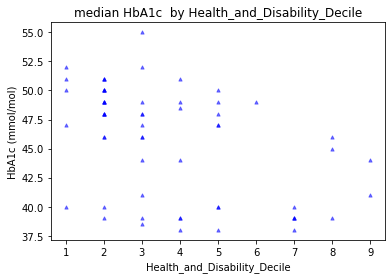

In [32]:
#median HbA1c by Health_and_Disability_Decile as HbA1c data not normally distributed.
fig, ax = plt.subplots()

ax.scatter(x=df['Health_and_Disability_Decile'], y=df['median_HbA1c'], 
           c= 'blue', 
           alpha=0.5, 
           s=10, 
           marker='^')
ax.set_xlabel('Health_and_Disability_Decile')
ax.set_ylabel('HbA1c (mmol/mol)')
ax.set_title('median HbA1c  by Health_and_Disability_Decile')